<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A1_2_Seunghyeon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the CSV file and sort the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1.2 Felicidad y GDP.csv to A1.2 Felicidad y GDP.csv


In [ ]:
import pandas as pd

df = pd.read_csv("A1.2 Felicidad y GDP.csv")
df_sort_felicidad = df.sort_values(by="Felicidad", ascending=False)
df_sort_gdp = df.sort_values(by="GDP", ascending=False)
print("Top 10 países con mayor GDP:")
print(df_sort_gdp.head(10))

Top 10 países con mayor GDP:
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


2. GDP Log conversion and visualization

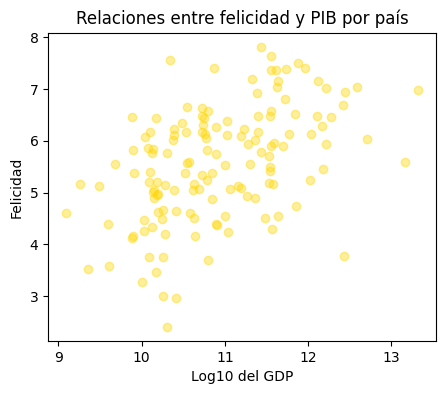

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df["log_GDP"] = np.log10(df["GDP"])
plt.figure(figsize=(5, 4))
plt.scatter(df['log_GDP'], df['Felicidad'], alpha=0.4, color='Gold')
plt.xlabel("Log10 del GDP")
plt.ylabel("Felicidad")
plt.title("Relaciones entre felicidad y PIB por país")
plt.show()

3. Calculate regression coefficients

In [ ]:
x=df['log_GDP']
y=df['Felicidad']
x_mean=np.mean(x)
y_mean=np.mean(y)
Var=np.sum((x-x_mean)**2)
Cov=np.sum((x-x_mean)*(y-y_mean))
B1=Cov/Var
B0=y_mean-B1*x_mean
print("y = %fx %f" % (B1,B0))

y = 0.628128x -1.302350


4. Regression Line Visualization

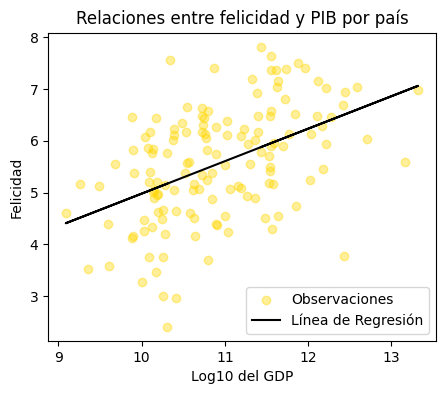

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df['log_GDP'], df['Felicidad'], alpha=0.4, color='Gold', label="Observaciones")
plt.plot(x, B0 + B1 * x, color='black', label="Línea de Regresión")
plt.xlabel("Log10 del GDP")
plt.ylabel("Felicidad")
plt.title("Relaciones entre felicidad y PIB por país")
plt.legend()
plt.show()

5. RSS calculation

In [ ]:
RSS = np.sum((y-(B0 + B1 * x))**2)
print("RSS =", RSS)

RSS = 131.3738317732635


6. Standard error (SE)

In [ ]:
n = len(df)
SE = np.sqrt(RSS / (n - 2))
print("SE =", SE)

SE = 0.9721807858537376


7. R²calculation

In [ ]:
TSS = np.sum((y - y_mean) ** 2)
R_squ = 1 - (RSS / TSS)
print("R**2 =", R_squ)

R**2 = 0.22166361654970657


8. Verification by statsmodels

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df["log_GDP"])
model = sm.OLS(df["Felicidad"], X).fit()
print(model.summary())
print("p-values:", model.pvalues)
print("RSE (Residual Standard Error):", model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.83e-09
Time:                        10:25:07   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2